In [1]:
import numpy as np
import torch 
import matplotlib.pyplot as plt
from tqdm import tqdm
from scipy.integrate import odeint
from scipy.fft import rfft, rfftfreq

In [2]:
def LinearEQ(t,S,w):
    return w*S

def multi_EQ(S,t,epsilon):
    """ multi_EQ dynamical model. """
    x_1 = (S[1]);
    x_2 = -epsilon*S[1] - np.sin(S[0]);
    dS  = np.array([x_1,x_2]);
    return dS

def periodic(S,t):
    """ periodic VDP dynamical model. """
    x_1 = (S[1]);
    x_2 = (1-S[0]**2)*S[1] - (S[0]);
    dS  = np.array([x_1,x_2]);
    return dS

def quasi_periodic(S,t,A,T):
    """ periodic VDP dynamical model. """
    x_1 = (S[1]);
    x_2 = (1-S[0]**2)*S[1] - (S[0]) + A*np.cos(2*np.pi*t/T);
    dS  = np.array([x_1,x_2]);
    return dS

def quasi_periodicL(S,t,f1,f2):
    """ periodic VDP dynamical model. """
    A = np.array([[0,2*np.pi*f1,0,0],[-2*np.pi*f1,0,0,0],[0,0,0,2*np.pi*f2],[0,0,-2*np.pi*f2,0]])
    dS = np.dot(A,S)
    return dS

def Lorenz_63(S,t,sigma,rho,beta):
    """ Lorenz-63 dynamical model. """
    x_1 = sigma*(S[1]-S[0]);
    x_2 = S[0]*(rho-S[2])-S[1];
    x_3 = S[0]*S[1] - beta*S[2];
    dS  = np.array([x_1,x_2,x_3]);
    return dS

# Equilibrium points

In [3]:
x0 = np.arange(-10,10.5,0.5)
y0 = np.arange(-4,4.5,0.5)
x_gridded, y_gridded = np.meshgrid(x0,y0)
epsilon   = 0.4
dt = 0.01
T0 = 0.
Tf = 100.
S  = []
for i in range(x_gridded.shape[0]):
    for j in range(x_gridded.shape[1]):
        init_cond = np.array([x_gridded[i,j],y_gridded[i,j]])
        S.append(odeint(multi_EQ,init_cond,np.arange(T0,Tf+0.000001,dt),args=(epsilon,)));
S = np.array(S)

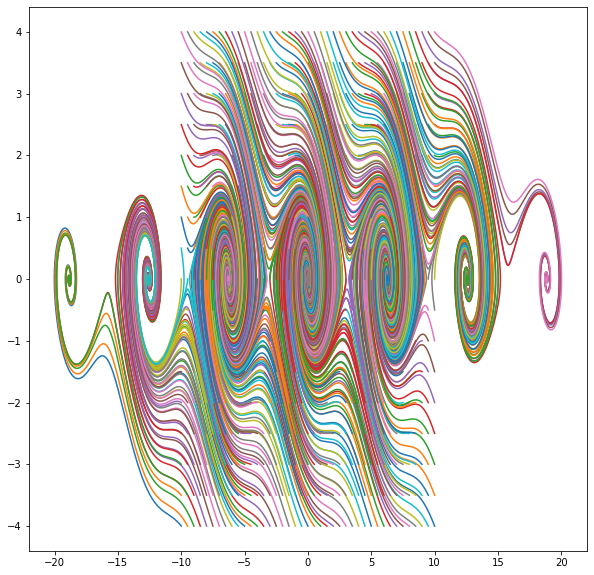

In [4]:
plt.figure(figsize = (10,10))
for i in range(S.shape[0]):
    plt.plot(S[i,:,0],S[i,:,1])

# Periodic orbits

In [5]:
x0 = np.arange(-10,10.5,1.0)
y0 = np.arange(-4,4.5,1.0)
x_gridded, y_gridded = np.meshgrid(x0,y0)
dt = 0.01
T0 = 0.
Tf = 1000.
S  = []
for i in range(x_gridded.shape[0]):
    for j in range(x_gridded.shape[1]):
        init_cond = np.array([x_gridded[i,j],y_gridded[i,j]])
        S.append(odeint(periodic,init_cond,np.arange(T0,Tf+0.000001,dt)));
S = np.array(S)

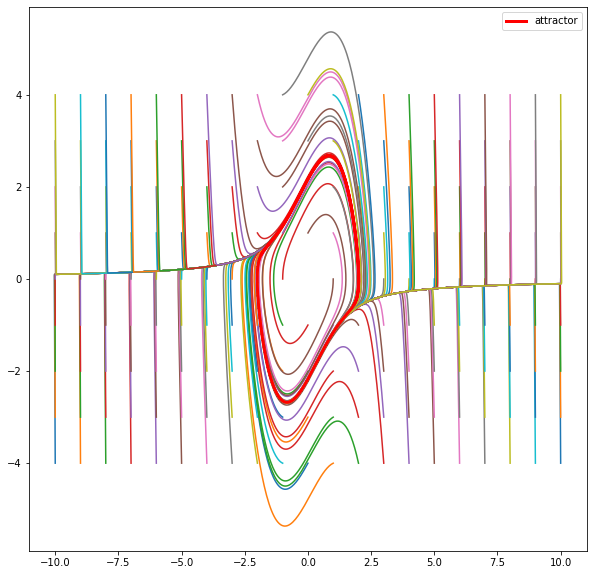

In [6]:
plt.figure(figsize = (10,10))
for i in range(S.shape[0]):
    plt.plot(S[i,:,0],S[i,:,1])
plt.plot(S[i,-1000:,0],S[i,-1000:,1],c = 'r',lw = 3, label = 'attractor')
plt.legend()

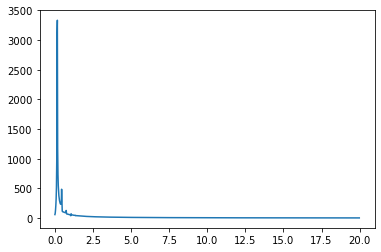

In [7]:
# spectrum of the solution
N = S[0][-5000:,0].shape[0]
yf = rfft(S[0][-5000:,0])
xf = rfftfreq(N, dt)
plt.plot(xf[:1000], np.abs(yf)[:1000])
plt.show()

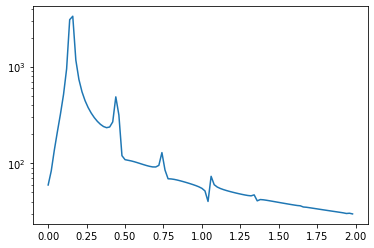

In [8]:
plt.semilogy(xf[:100], np.abs(yf)[:100])
plt.show()

# Quasi-Periodic orbits

In [9]:
x0 = np.arange(-10,10.5,1.0)
y0 = np.arange(-4,4.5,1.0)
x_gridded, y_gridded = np.meshgrid(x0,y0)
A  = 0.5
T  = 2*np.pi/1.1
dt = 0.01
T0 = 0.
Tf = 1000.
S  = []
for i in range(x_gridded.shape[0]):
    for j in range(x_gridded.shape[1]):
        init_cond = np.array([x_gridded[i,j],y_gridded[i,j]])
        S.append(odeint(quasi_periodic,init_cond,np.arange(T0,Tf+0.000001,dt),args=(A,T)));
S = np.array(S)

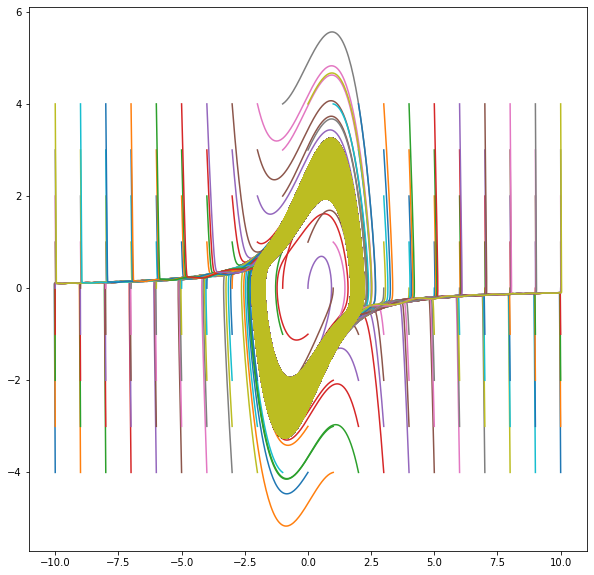

In [10]:
plt.figure(figsize = (10,10))
for i in range(S.shape[0]):
    plt.plot(S[i,:,0],S[i,:,1])

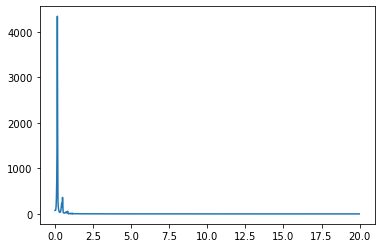

In [11]:
# spectrum of the solution
N = S[0][-5000:,0].shape[0]
yf = rfft(S[0][-5000:,0])
xf = rfftfreq(N, dt)
plt.plot(xf[:1000], np.abs(yf)[:1000])
plt.show()

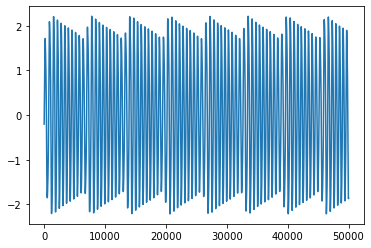

In [12]:
plt.plot(S[0][-50000:,0])

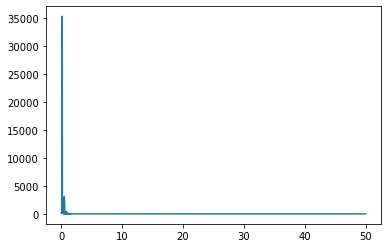

In [13]:
# spectrum of the solution
N = S[0][-50000:,0].shape[0]
yf = rfft(S[0][-50000:,0])
xf = rfftfreq(N, dt)
plt.plot(xf[:], np.abs(yf)[:])
plt.show()

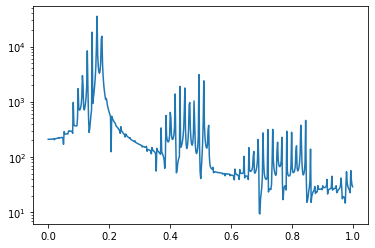

In [14]:
plt.semilogy(xf[:500], np.abs(yf)[:500])
plt.show()

# Periodic vs Quasi-periodic solutions : comparaisons on a linear model with commensurable frequencies 

In [15]:
x0 = np.arange(-10,10.5,1.0)
y0 = np.arange(-4,4.5,1.0)
x_gridded, y_gridded = np.meshgrid(x0,y0)
f1  = 2#.5
f2  = 3#2*np.pi/1.1
dt = 0.01
T0 = 0.
Tf = 100.
S  = []
X0 = np.array([0,5,0,5])
S = (odeint(quasi_periodicL,X0,np.arange(T0,Tf+0.000001,dt),args=(f1,f2)));

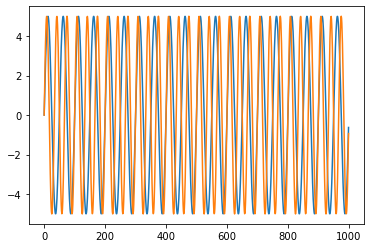

In [16]:
plt.plot(S[:1000,0])
plt.plot(S[:1000,2])

/homes/s17ouala/miniconda3/envs/DYN_ID2/lib/python3.7/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  after removing the cwd from sys.path.


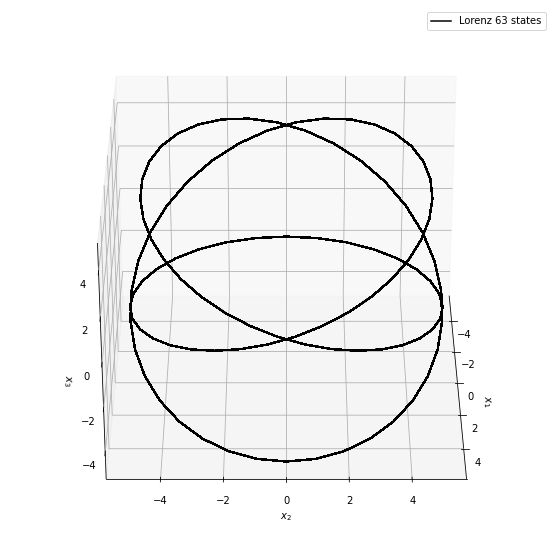

In [17]:
# plot
qp_signal = S[0]
fig=plt.figure(figsize=(10,10))
ax=fig.gca(projection='3d')
line1,=ax.plot(S[:,1],S[:,2],S[:,3],'k')
ax.set_xlabel('$x_1$');ax.set_ylabel('$x_2$');ax.set_zlabel('$x_3$')
plt.legend([line1], ['Lorenz 63 states'])
ax.view_init(30, 0)

# Periodic vs Quasi-periodic solutions : comparaisons on a linear model with incommensurable frequencies 

In [18]:
x0 = np.arange(-10,10.5,1.0)
y0 = np.arange(-4,4.5,1.0)
x_gridded, y_gridded = np.meshgrid(x0,y0)
f1  = np.sqrt(2)#.5
f2  = 3#2*np.pi/1.1
dt = 0.01
T0 = 0.
Tf = 100.
S  = []
X0 = np.array([0,5,0,5])
S = (odeint(quasi_periodicL,X0,np.arange(T0,Tf+0.000001,dt),args=(f1,f2)));

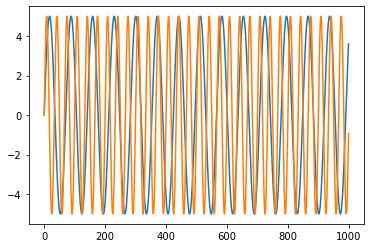

In [19]:
plt.plot(S[:1000,0])
plt.plot(S[:1000,2])

/homes/s17ouala/miniconda3/envs/DYN_ID2/lib/python3.7/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  after removing the cwd from sys.path.


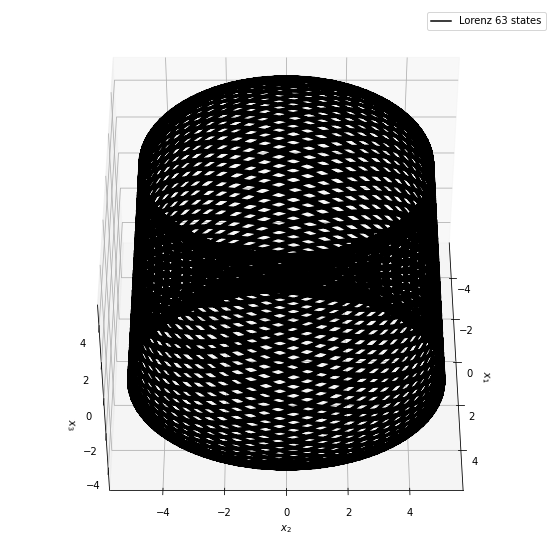

In [20]:
# plot
qp_signal = S[0]
fig=plt.figure(figsize=(10,10))
ax=fig.gca(projection='3d')
line1,=ax.plot(S[:,1],S[:,2],S[:,3],'k')
ax.set_xlabel('$x_1$');ax.set_ylabel('$x_2$');ax.set_zlabel('$x_3$')
plt.legend([line1], ['Lorenz 63 states'])
ax.view_init(45, 0)

# Chaotic solutions 

In [21]:
x0 = np.array([8.0,0.0,30.0]);
dt = 0.01
T0 = 0.
Tf = 100.
sigma = 10.0
rho   = 28.0
beta  = 8.0/3
S     = odeint(Lorenz_63,x0,np.arange(T0,Tf+0.000001,dt),args=(sigma,rho,beta));

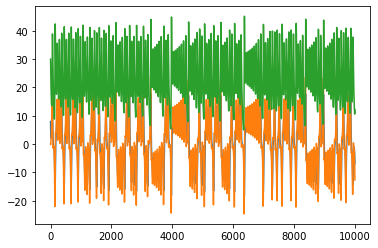

In [22]:
plt.plot(S)

/homes/s17ouala/miniconda3/envs/DYN_ID2/lib/python3.7/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  This is separate from the ipykernel package so we can avoid doing imports until


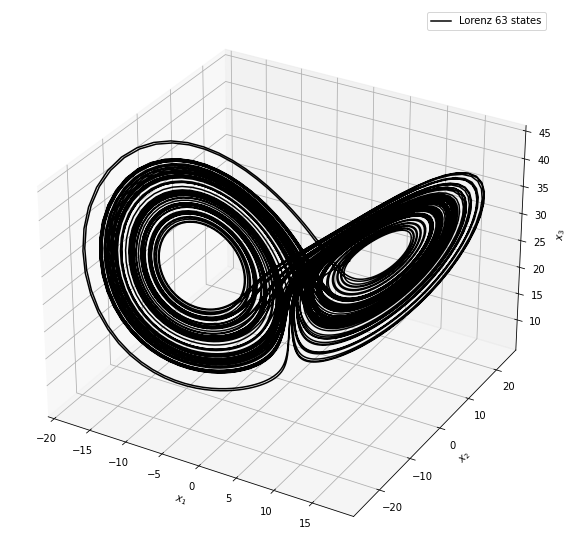

In [23]:
# plot
fig=plt.figure(figsize=(10,10))
ax=fig.gca(projection='3d')
line1,=ax.plot(S[:,0],S[:,1],S[:,2],'k')
ax.set_xlabel('$x_1$');ax.set_ylabel('$x_2$');ax.set_zlabel('$x_3$')
plt.legend([line1], ['Lorenz 63 states'])

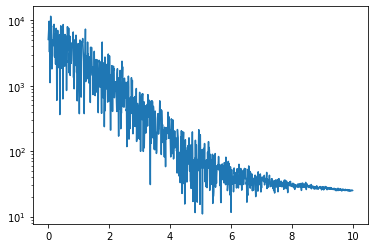

In [24]:
N = S[:,0].shape[0]
yf = rfft(S[:,0])
xf = rfftfreq(N, dt)

plt.semilogy(xf[:1000], np.abs(yf)[:1000])
plt.show()